In [28]:
import numpy as np
import matplotlib.pyplot as plt

#set parameters
DT = 0.05
DX = 1
por = 0.3
Cf = 100.0
Cb = 0.0
DH = 2.5
q = 1.5

L = 50
Tmax = 5
N = int(L / DX) + 1

node_locations = np.arange(0, L + DX, DX)
number_timesteps = int(Tmax / DT)
time_increments = np.arange(DT, Tmax + DT, DT)
Cnew = np.zeros([N,number_timesteps])

#set coefficients in in FD equations
D = DH/por
p = (D * DT) / (DX**2)
r = (q * DT) / (2 * DX) #maybe * por?

a = p - r
b = 2 * por + 2 * p
c = p + r


for i in range(number_timesteps):
    Cnew[0,i] = Cf  # Boundary condition on the left
    Cnew[50,i] = Cb  # Boundary condition on the right
    
    D = np.zeros(N + 1)
    E = np.zeros(N + 1)
    F = np.zeros(N + 1)

    for k in range(1, N-1):
        if k == 1:
            D[k] = a * Cnew[k+1,i-1] + (4 * por - b) * Cnew[k,i-1] + c * Cnew[k-1,i-1]
            E[k] = a / b
            F[k] = (D[k] + c * Cnew[k - 1,i-1]) / b
        else:
            D[k] = a * Cnew[k+1,i-1] + (4 * por - b) * Cnew[k,i-1] + c * Cnew[k-1,i-1]
            E[k] = a / (b - c * E[k-1])
            F[k]= (D[k] + c * F[k-1]) / (b - c * E[k-1])
    
    for k in range(N - 2, 0, -1):
        Cnew[k,i] = F[k] + E[k] * Cnew[k+1,i]

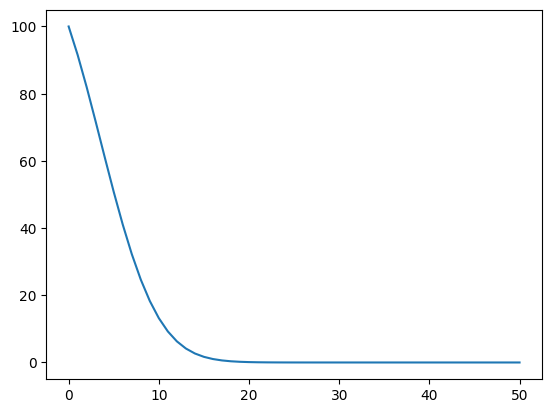

In [30]:
plt.plot(Cnew[:,10])
plt.show()